In [1]:
import pandas as pd

In [14]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data.csv')

Загрузите датасет transaction_data.csv. Проверьте размер таблицы, типы переменных, число пропущенных значений и описательную статистику.

Вопрос: сколько в датасете пропущенных значений?

In [15]:
df.isna().sum()

date           0
name           0
transaction    0
dtype: int64

Проверьте, какие значения принимает колонка transaction? Сколько наблюдений относятся к тому или иному уровню? Визуализируйте результат с помощью барплота.

Вопрос: расположите уровни переменной в порядке убывания числа относящихся наблюдений (от большего к меньшему)

In [16]:
df.head()

,date,name,transaction
0,2020-03-02 00:37:20,Ekaterina_Petrova,cancelled
1,2020-03-02 00:59:09,Irina_Fedorova,successfull
2,2020-03-02 01:06:14,Ekaterina_Smirnova,successfull
3,2020-03-02 00:02:58,Lolita_Polyanova,cancelled
4,2020-03-02 00:17:52,Julia_Smirnova,cancelled


In [17]:
df.transaction.value_counts()

successfull    3692
cancelled      1619
error             4
Name: transaction, dtype: int64

Сколько транзакций осуществил каждый из пользователей? Осуществлёнными считаются транзакции со значением successfull

Посмотрите на характеристики распределения, а затем постройте гистограмму числа успешных транзакций, совершённых каждым пользователем, где

по оси x – число транзакций
по оси y – доля пользователей с таким числом транзакций
Выберите верные утверждения.

In [18]:
import seaborn as sns

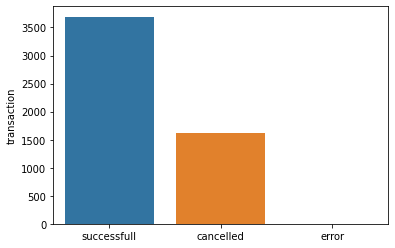

In [19]:
sns.barplot(x = df.transaction.value_counts().index, y = df.transaction.value_counts())

In [24]:
by_user = df.query('transaction == "successfull"').groupby('name') \
                .agg({'transaction':'count'})

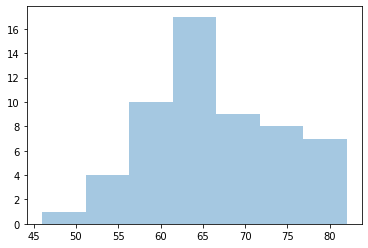

In [29]:
sns.distplot(by_user, kde = False)

In [31]:
by_user.describe()

,transaction
count,56.000000
mean,65.928571
std,7.787769
min,46.000000
25%,61.000000
50%,64.000000
75%,72.000000
max,82.000000


💀 Сложное задание! 💀

К вам пришёл коллега с немного обновленными данными

Постройте сводную таблицу user_vs_minute_pivot, где

столбцы – имена пользователей
строки – минута времени осуществления операции (minute)
значения – число совершённых операций
Пропущенные значения заполните нулями.

Note: фильтровать успешные транзакции не нужно - постройте табличку по всем

In [32]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/361624/transaction_data_updated.csv')

In [33]:
df_number = df.groupby(['name', 'minute'], as_index = False) \
    .agg({'transaction':'count'}).rename(columns = {'transaction':'transaction_number'})

In [40]:
# PIVOT
user_vs_minute_pivot = df_number.pivot(index = 'minute', columns = 'name', values = 'transaction_number').fillna(0, inplace = True)

In [45]:
# PIVOT TABLE
user_vs_minute_pivot = df.pivot_table(index = 'minute', columns = 'name', values = 'transaction',
              aggfunc = 'count', fill_value = 0)
user_vs_minute_pivot

name,Ekaterina_Fedorova,Ekaterina_Ivanova,Ekaterina_Lesnova,Ekaterina_Ozerova,Ekaterina_Petrova,Ekaterina_Polyanova,Ekaterina_Smirnova,Irina_Fedorova,Irina_Ivanova,Irina_Lesnova,...,Svetlana_Petrova,Svetlana_Polyanova,Svetlana_Smirnova,Vasilisa_Fedorova,Vasilisa_Ivanova,Vasilisa_Lesnova,Vasilisa_Ozerova,Vasilisa_Petrova,Vasilisa_Polyanova,Vasilisa_Smirnova
minute,,,,,,,,,,,,,,,,,,,,,
0,3,4,2,3,4,4,2,1,2,2,...,0,3,1,1,4,1,3,0,0,1
1,4,4,0,4,2,5,4,4,4,3,...,4,5,3,2,3,3,0,0,3,2
2,1,2,4,4,2,1,3,2,3,3,...,4,1,3,3,0,1,2,1,3,1
3,3,0,2,0,5,2,1,3,2,2,...,1,5,5,2,4,0,3,4,1,0
4,3,0,0,3,1,1,2,3,2,1,...,1,2,2,1,1,2,2,3,0,1
5,3,0,2,3,1,0,5,3,1,3,...,0,2,3,1,0,0,3,0,2,1
6,4,1,2,2,0,4,5,2,2,2,...,2,1,4,1,2,4,1,2,0,2
7,3,2,1,2,2,3,4,1,1,3,...,3,1,1,2,4,1,0,1,2,2
8,2,4,3,1,0,3,2,1,1,0,...,0,1,0,1,2,4,2,1,1,1


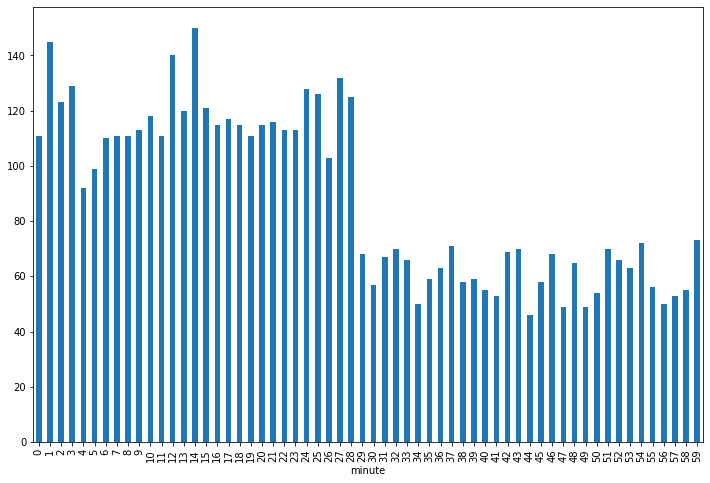

In [48]:
user_vs_minute_pivot.sum(axis = 1).plot.bar(figsize = (12,8));

Извлекли минутную часть времени, а не число минут с начала дня!!!!

In [50]:
df['date'] = pd.to_datetime(df.date)

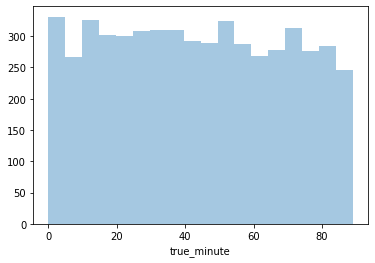

In [56]:
df['true_minute'] = df.date.dt.minute + df.date.dt.hour * 60
sns.distplot(df['true_minute'], kde = False);

В папке subsid (shared/homeworks/python_ds_miniprojects/5_subsid) находятся файлы (tm_sales_1, tm_sales_2, ...) с продажами продуктов через телемаркетинг. Каждый файл содержит, как минимум, 4 колонки (поля): FILIAL_ID, SUBS_ID, PROD_ID, ACT_DTTM.

Суть задачи в том, чтобы проверить подключения продуктов определенным пользователям, сджойнив файлы с продажами с логами по подключениям в системе.

Особенности:

сотрудники телемаркетинга не всегда указывают полный id, если 'id' нет в начале SUBS_ID, то нужно его добавить
поля в файлах могут быть расположены абсолютно случайным образом, но названия полей статичны
продажа не засчитывается, если отключение (END_DTTM) произошло меньше чем через 5 минут после подключения (START_DTTM)
если в файле с продажами встречается строка без указанного SUBS_ID, она пропускается
Сохраните результат в датафрэйм с разделителем ;, содержащий корректные подключения.

Note: обратите внимание на то, как пандас переводит дату из строки, возможно вам понадобится параметр format

Пример содержания итогового файла (колонка difference это разница между START_DTTM и END_DTTM):

In [2]:
import pandas as pd
import os 

In [7]:
path = '/home/jupyter-i.tsukanov-7/shared/homeworks/python_ds_miniprojects/5_subsid/subsid'

In [8]:
os.listdir(path)

['prod_activations_logs.csv',
 'tm_sales_1.csv',
 'tm_sales_2.csv',
 'tm_sales_3.csv']

In [9]:
from pathlib import Path

In [18]:
tms = Path(path).glob('tm*.csv')

In [19]:
df = pd.DataFrame()

In [20]:
for tm in tms:
    temp_df = pd.read_csv(tm,sep = ';')
    df = pd.concat((df, temp_df))

In [22]:
def id_adder(value):
    if value.startswith('id'):
        return value
    else:
        return 'id' + value

In [23]:
df = df.dropna(subset=['SUBS_ID'])

In [24]:
df.SUBS_ID = df.SUBS_ID.apply(id_adder)

/opt/tljh/user/lib/python3.7/site-packages/pandas/core/generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [25]:
df

,SUBS_ID,FILIAL_ID,PROD_ID,ACT_DTTM
0,id4651830,1,1954,20-03-2020 14:59
1,id7646509,5,6431,19-03-2020 13:00
2,id7412683,4,3313,22-03-2020 17:25
0,id5416547,3,1743,17-03-2020 10:17
2,id8362218,7,9879,05-03-2020 11:42
3,id2185490,2,3210,16-03-2020 16:28
0,id5764122,3,1499,18-03-2020 15:44
1,id7642700,6,3020,15-03-2020 14:21
2,id1374509,2,5677,17-03-2020 11:48


In [27]:
logs = list(Path(path).glob('*logs*'))[0]

In [28]:
logs = pd.read_csv(logs, sep= ';')

In [33]:
full_data = df.merge(logs, on = ['SUBS_ID', 'PROD_ID'])

In [38]:
full_data[['ACT_DTTM', 'START_DTTM', 'END_DTTM']] = full_data[['ACT_DTTM', 'START_DTTM', 'END_DTTM']] \
    .apply(lambda x: pd.to_datetime(x, format = '%d-%m-%Y %H:%M'))

In [39]:
#вариант2
full_data[['ACT_DTTM', 'START_DTTM', 'END_DTTM']] = full_data[['ACT_DTTM', 'START_DTTM', 'END_DTTM']] \
    .apply(pd.to_datetime,format = '%d-%m-%Y %H:%M')

In [41]:
full_data['difference'] = full_data['END_DTTM'] - full_data['START_DTTM']

In [43]:
greater_5 = full_data.difference > '5m'

In [46]:
df = full_data.loc[greater_5]

In [47]:
df[['ACT_DTTM','FILIAL_ID','difference']].to_csv('my_tm.csv',sep = ';', index = False)

In [53]:
df.SUBS_ID.sort_values().str.cat(sep = ', ')

'id2185490, id4651830, id5416547, id7642700'